# Plotting in python for statistics

First we need to import the modules that will help us get the numbers to the screen.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# The following line is only needed in jupyter notebook (i.e. here), not when doning this from command line.
%matplotlib inline

Let's try a quatdratic function

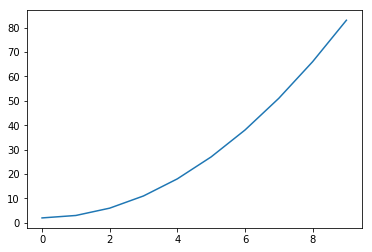

In [6]:
# Create the x-axis data
x = np.arange(10)
# y-axis data is a function of the x-axis data
y = x**2 + 2

plt.figure()    # Create the figure/graph
plt.plot(x, y)  # Plot x vs y
plt.show()      # Tell python to output an image

We can plot multiple lines in the same graph. See how matplotlib automatically scales each axis to the value being plotted.

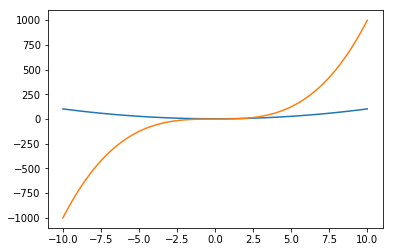

In [107]:
x = np.linspace(-10, 10, 100) # Another way of creating the x-axis, 100 points in the interval [-10, 10]
y1 = x**2 + 2
y2 = x**3 - 1

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()


We can define a function for each value as $y_i = f(x_i)$. Note that when plotting f(x) as a line, python will not take the steps in the function into account.

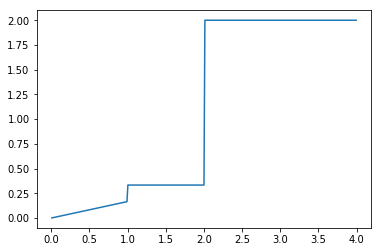

In [109]:
x = np.linspace(-2, 10, 1000)

# Exercise 5.2.1
def f(x):
    if 0 < x <= 1:
        return (1/6)*x
    elif 1 < x <= 2:
        return 1/3
    elif 2 < x <= 4:
        return 2
    else:
        return np.nan
f = np.vectorize(f) # This transforms the function so it is applied for each element of the input data

plt.figure()
plt.plot(x, f(x), '-')
plt.show()


For using a normal distribution, we can import code from scipy for that. Most common statistical functions can be found in scipy.stats, so you do not have to ...

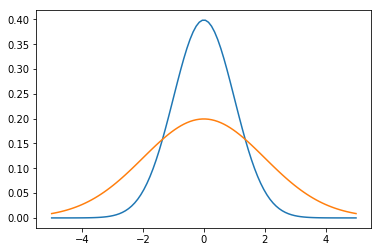

In [12]:
from scipy.stats import norm

x = np.linspace(-5, 5, 100)
y1 = norm(0, 1).pdf(x)
y2 = norm(0, 2).pdf(x)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()


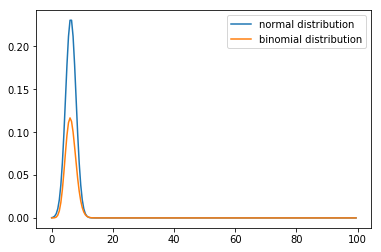

In [190]:
from scipy.stats import binom

N = 200
p = .0625
k = np.arange(N)
x = 100*k/N
y1 = norm(100*p, 100/N*np.sqrt(N*p*(1-p))).pdf(x)
y2 = binom(n=N, p=p).pmf(k)

plt.figure()
plt.plot(x, y1, label="normal distribution")
plt.plot(x, y2, label="binomial distribution")
plt.legend()
plt.show()


The normalization for continous and discrete distributions are different. The integral of a continous PDF should be 1. However, for a PMF, it should sum to 1.  

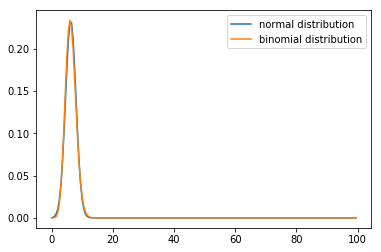

In [197]:
N = 200
p = .0625
k = np.arange(N)
x = 100*k/N
y1 = norm(100*p, 100/N*np.sqrt(N*p*(1-p))).pdf(x)
y2 = binom(n=N, p=p).pmf(k)

y2 /= np.trapz(y2, x) # Normalization

plt.figure()
plt.plot(x, y1, label="normal distribution")
plt.plot(x, y2, label="binomial distribution")
plt.legend()
plt.show()


To get more interesting data, the bead lab data can be imported from csv. Python has a csv module but it is not used here as an example on how to read in data "manually". The number of samples of each study can be calculated as a sum of the different categories ($n(total) = \sum_{colours} n(colour)$).

In [70]:
with open("bead_lab.csv", 'r') as f:
    colours = f.readline()
    colours = [e.strip() for e in colours.split(",")]
    data = dict()
    for c in colours:
        data[c] = list()
    for line in f.readlines():
        for c, n in zip(colours, line.split(",")):
            data[c].append(int(n.strip()))
data["N"] = np.zeros(len(data[colours[0]]), dtype=np.int)
for c in colours:
    data[c] = np.asarray(data[c], dtype=np.int)
    data["N"] += data[c]
data


{'Blue': array([ 2,  9,  1, 20,  8,  0, 18, 13,  6, 10, 20,  6,  5,  6, 17, 26, 10,
         0, 18,  5, 15, 18]),
 'Green': array([ 3, 27,  5, 26, 22,  3, 44, 25, 13, 24, 32,  7, 23, 16, 26, 41, 27,
         1, 34,  4,  4, 33]),
 'N': array([ 20, 177,  10, 240, 141,  32, 317, 188, 106, 190, 380,  48, 129,
        123, 268, 293, 144,  14, 305,  41, 114, 265]),
 'Red': array([ 8, 43,  1, 56, 32, 10, 85, 43, 24, 44, 57,  9, 37, 37, 58, 54, 40,
         6, 87, 10, 33, 66]),
 'White': array([  5,  90,   2, 125,  73,  16, 158,  99,  57, 109, 261,  22,  57,
         54, 159, 157,  58,   6, 149,  20,  60, 135]),
 'Yellow': array([ 2,  8,  1, 13,  6,  3, 12,  8,  6,  3, 10,  4,  7, 10,  8, 15,  9,
         1, 17,  2,  2, 13])}

Estimated distributions from valuing each study equally, even the "my friends say"-study.

Colour	mean	std
White:	0.483	0.101
Red:	0.253	0.071
Blue:	0.068	0.033
Green:	0.140	0.086
Yellow:	0.055	0.024


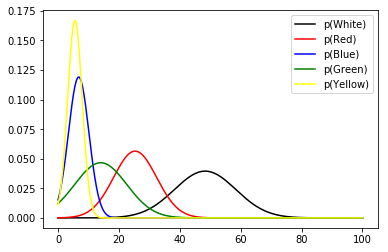

In [198]:
mu = dict()
std = dict()
print("Colour\tmean\tstd")
for c in colours:
    mu[c] = np.mean(data[c]/data["N"])
    std[c] = np.std(data[c]/data["N"])
    print("%s:\t%.3f\t%.3f" % (c, mu[c], std[c]))

x = np.linspace(0, 100, 200)
colours_plt = [c.lower() if c.lower().find("white") < 0 else "k" for c in colours]
plt.figure()
for c, c_plt in zip(colours, colours_plt):
    y = norm(100*mu[c], 100*std[c]).pdf(x)
    plt.plot(x, y, c=c_plt, label="p("+c+")")
plt.legend()
plt.show()

A better way, not always possible in a meta study, is to use all the data as one investigation. The sampling for each categpry separately is now modelled as Bernouli trials using a binomial distribution.

Colour	Probability
White:	0.528
Red:	0.237
Blue:	0.066
Green:	0.124
Yellow:	0.045
N: 3545


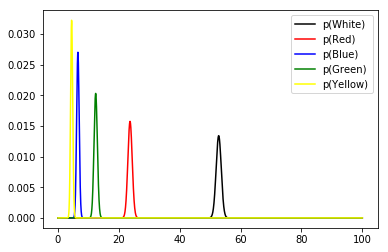

In [203]:
N = np.sum(data["N"])
k = np.arange(N)

print("Colour\tProbability")
p = dict()
for c in colours:
    p[c] = np.sum(data[c])/N
    print("%s:\t%.3f" % (c, p[c]))
print("N: %i" % N)

plt.figure()
x = 100*k/N
for c, c_plt in zip(colours, colours_plt):
    y = binom(n=N, p=p[c]).pmf(k)
    plt.plot(x, y, c=c_plt, label="p("+c+")")
    #plt.plot(100*p[c]*np.ones(2), [0, 0.002], c=c_plt, label="mu "+c)
plt.legend()
plt.show()


We could also value the different studies in proportion to its sample size. Let's say that each study only reported percentages and sample size of their data.

	| Weighted:	| Unweighted:
Colour:	| Mean:	Std:	| Mean:	Std:
White	| 0.528	0.086	| 0.483	0.101
Red	| 0.237	0.050	| 0.253	0.071
Blue	| 0.066	0.021	| 0.068	0.033
Green	| 0.124	0.040	| 0.140	0.086
Yellow	| 0.045	0.020	| 0.055	0.024


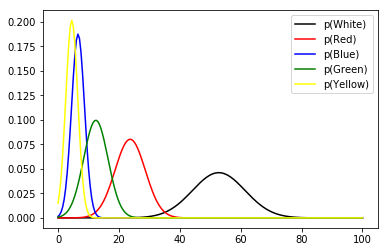

In [154]:
w = data["N"]/np.sum(data["N"])

print("\t| Weighted:\t| Unweighted:")
print("Colour:\t| Mean:\tStd:\t| Mean:\tStd:")
mu_w = dict()
std_w = dict()
for c in colours:
    mu_w[c] = np.sum((data[c]/data["N"])*w)
    std_w[c] = np.sqrt(np.sum(w*((data[c]/data["N"]-mu[c])**2)))
    print("%s\t| %.3f\t%.3f\t| %.3f\t%.3f" % (c, mu_w[c], std_w[c], mu[c], std[c]))

x = np.linspace(0, 100, 200)
plt.figure()
for c, c_plt in zip(colours, colours_plt):
    y = norm(100*mu_w[c], 100*std_w[c]).pdf(x)
    plt.plot(x, y, c=c_plt, label="p("+c+")")
plt.legend()
plt.show()


What if we model the variance from a binomial distribution instead of as a normal distribution from 
the relative frequencies of each study.

In [ ]:
print("\t| Weighted:\t| Unweighted:")
print("Colour:\t| Mean:\tStd:\t| Mean:\tStd:")
mu_w = dict()
std_w = dict()
for c in colours:
    p = data[c]/data["N"]
    mu_w[c] = np.sum(p*w)
    std_w[c] = np.sum(w*(p*(1-p)))
    print("%s\t| %.3f\t%.3f\t| %.3f\t%.3f" % (c, mu_w[c], std_w[c], mu[c], std[c]))

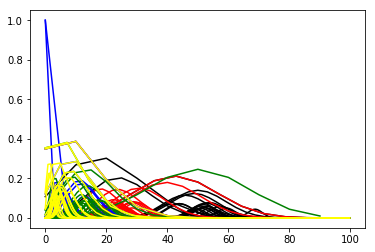

In [189]:
plt.figure()
for c, c_plt in zip(colours, colours_plt):
    p = data[c]/data["N"]
    for i in range(len(data["N"])):
        N = data["N"][i]
        k = np.arange(N)
        x = 100*k/N
        y = binom(n=N, p=p[i]).pmf(k)
        plt.plot(x, y, c=c_plt, label="p("+c+")"+str(i))
    #plt.plot(100*p[c]*np.ones(2), [0, 0.002], c=c_plt, label="mu "+c)
#plt.legend()
plt.show()

In [167]:
for c in colours:
    var = [n*p*(1-p) for p, n in zip(data[c]/data["N"], data["N"])]
    print(c, np.sqrt(var[:5]))
b = binom(n=data["N"][1], p=data[c][1]/data["N"][1])
np.sqrt(b.var())/data["N"][1]

White [1.93649167 6.6511118  1.26491106 7.73923984 5.93343693]
Red [2.19089023 5.70558256 0.9486833  6.55235327 4.97368964]
Blue [1.34164079 2.9227338  0.9486833  4.28174419 2.74701643]
Green [1.59687194 4.78344603 1.58113883 4.81490741 4.3089878 ]
Yellow [1.34164079 2.76376882 0.9486833  3.50654151 2.39680639]


0.015614513095786531

In [184]:
#p=0.0625
n_min = 9*(1-p)/p
n_min < data["N"]

array([False, False, False,  True, False, False,  True, False, False,
       False,  True, False, False,  True, False,  True,  True, False,
        True, False, False,  True])